#Loading the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)

# Display the first few rows of the dataset to understand its structure
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


#Task 1.1 - Develop a Line Plot Using Pandas

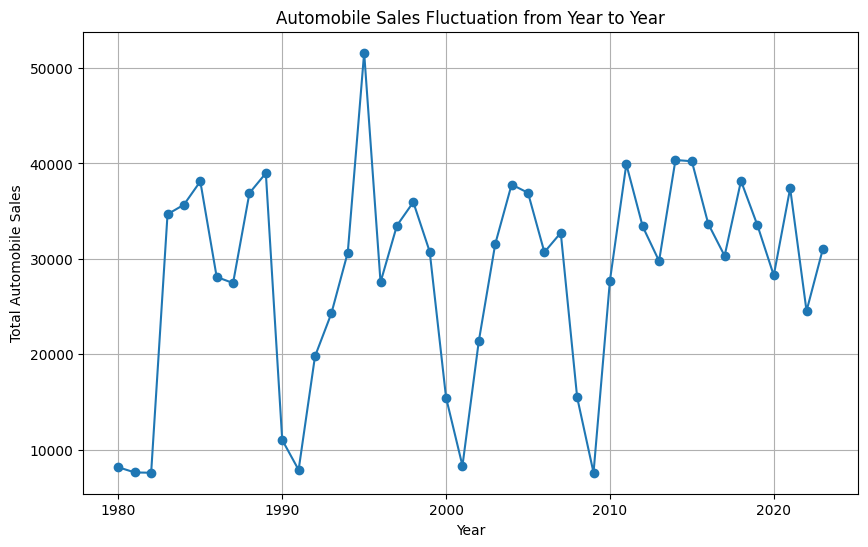

In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year from 'Date' column
df['Year'] = df['Date'].dt.year

# Group the data by year and sum the sales
yearly_sales = df.groupby('Year')['Automobile_Sales'].sum()

# Create the line plot
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o')
plt.title('Automobile Sales Fluctuation from Year to Year')
plt.ylabel('Total Automobile Sales')
plt.xlabel('Year')
plt.grid(True)
plt.savefig('Line_plot_1.png')  # Save the plot for submission
plt.show()

#Task 1.2 - Plot Sales Trends for Vehicle Types

<Figure size 1000x600 with 0 Axes>

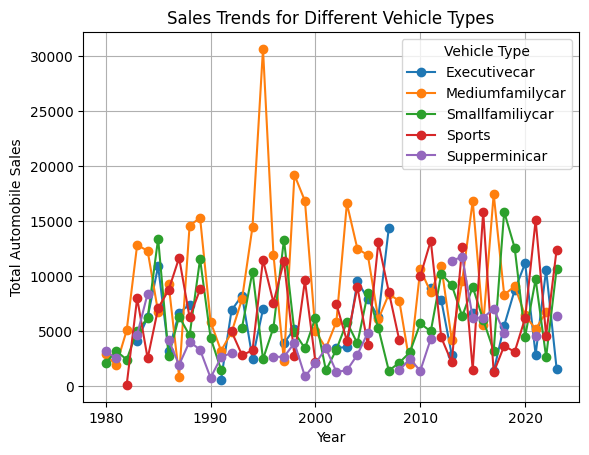

In [ ]:
# Group the data by year and vehicle type and sum the sales
vehicle_sales = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].sum().unstack()

# Create the line plot for each vehicle type
plt.figure(figsize=(10, 6))
vehicle_sales.plot(kind='line', marker='o')
plt.title('Sales Trends for Different Vehicle Types')
plt.ylabel('Total Automobile Sales')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title="Vehicle Type")
plt.savefig('Line_plot_2.png')  # Save the plot for submission
plt.show()

#Task 1.3 - Seaborn Bar Chart Comparison

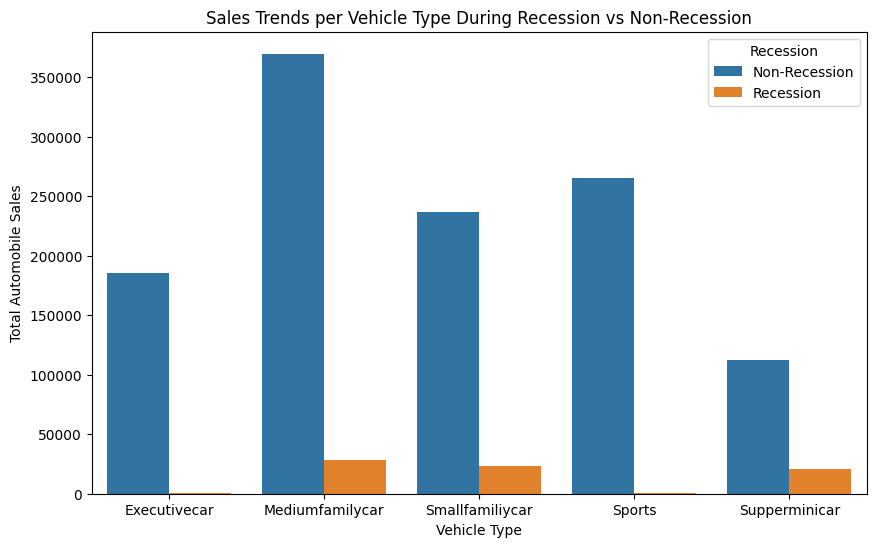

In [ ]:
# Assume recession and non-recession periods are defined (update with the correct logic)
df['Recession'] = df['Recession'].apply(lambda x: 'Recession' if x == 1 else 'Non-Recession')

# Group by Vehicle_Type and Recession period
recession_sales = df.groupby(['Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Vehicle_Type', y='Automobile_Sales', hue='Recession', data=recession_sales)
plt.title('Sales Trends per Vehicle Type During Recession vs Non-Recession')
plt.ylabel('Total Automobile Sales')
plt.xlabel('Vehicle Type')
plt.savefig('Bar_Chart.png')  # Save the plot for submission
plt.show()

#Task 1.4 - Subplot Comparison for GDP

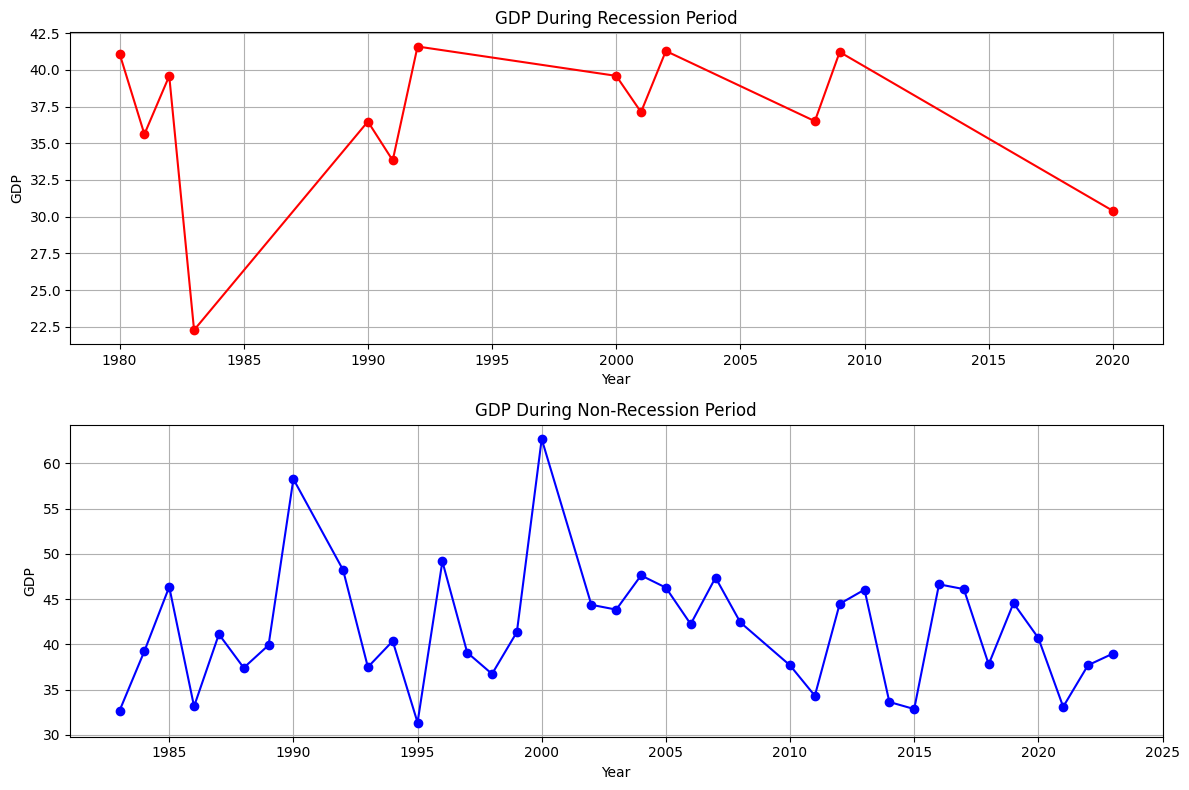

In [ ]:
# Create subplots for Recession and Non-Recession periods
plt.figure(figsize=(12, 8))

# Subplot 1: Recession Period
plt.subplot(2, 1, 1)
recession_gdp = df[df['Recession'] == 'Recession'].groupby('Year')['GDP'].mean()
recession_gdp.plot(kind='line', marker='o', color='r')
plt.title('GDP During Recession Period')
plt.ylabel('GDP')
plt.grid(True)

# Subplot 2: Non-Recession Period
plt.subplot(2, 1, 2)
non_recession_gdp = df[df['Recession'] == 'Non-Recession'].groupby('Year')['GDP'].mean()
non_recession_gdp.plot(kind='line', marker='o', color='b')
plt.title('GDP During Non-Recession Period')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.grid(True)

plt.tight_layout()
plt.savefig('Subplot.png')  # Save the plot for submission
plt.show()

#Task 1.5 - Bubble Plot for Seasonality Impact

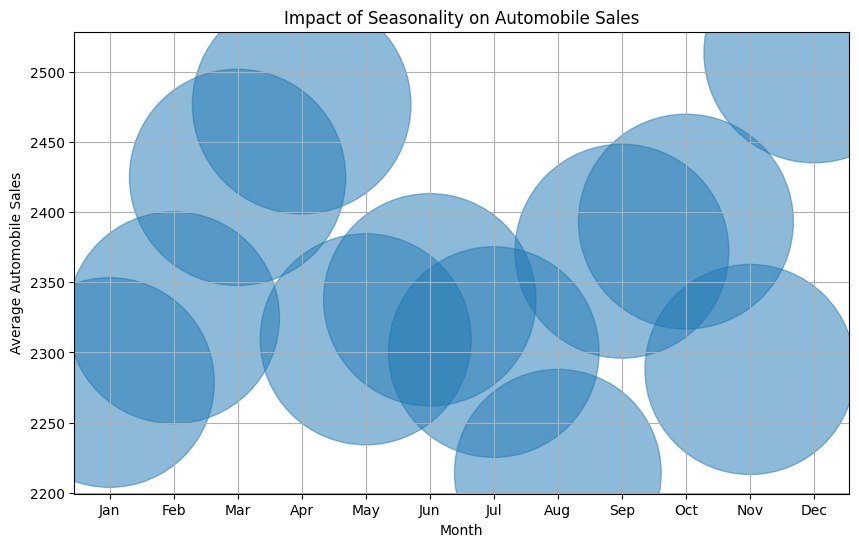

In [ ]:
# Extract month from 'Date' column
df['Month'] = df['Date'].dt.month

# Group by month and calculate mean sales
monthly_sales = df.groupby('Month')['Automobile_Sales'].mean()

# Create the bubble plot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_sales.index, monthly_sales, s=monthly_sales * 10, alpha=0.5)
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Month')
plt.ylabel('Average Automobile Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.savefig('Bubble.png')  # Save the plot for submission
plt.show()

#Task 1.6 - Scatter Plot for Vehicle Price vs Sales During Recession

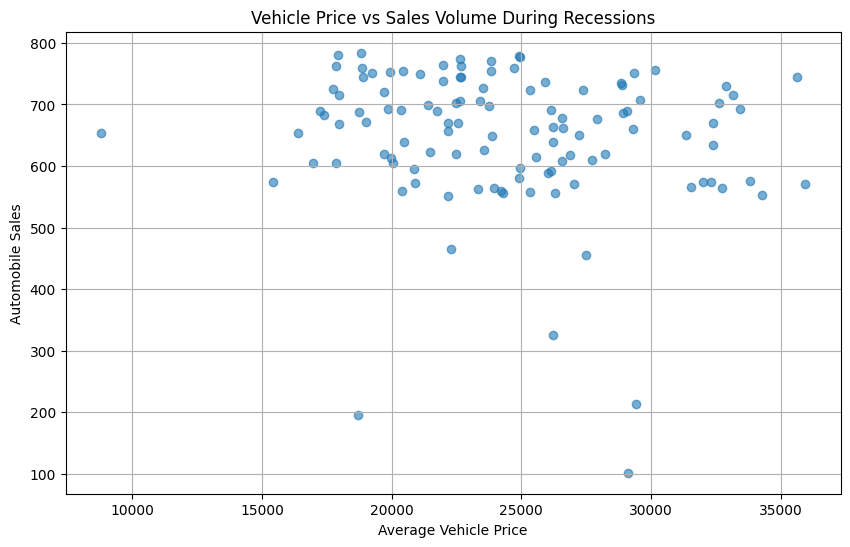

In [ ]:
# Filter data for recession periods
recession_data = df[df['Recession'] == 'Recession']

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], recession_data['Automobile_Sales'], alpha=0.6) # Changed 'Vehicle_Price' to 'Price'
plt.title('Vehicle Price vs Sales Volume During Recessions')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.savefig('Scatter.png')  # Save the plot for submission
plt.show()

#Task 1.7 - Pie Chart for Advertising Expenditure During Recession

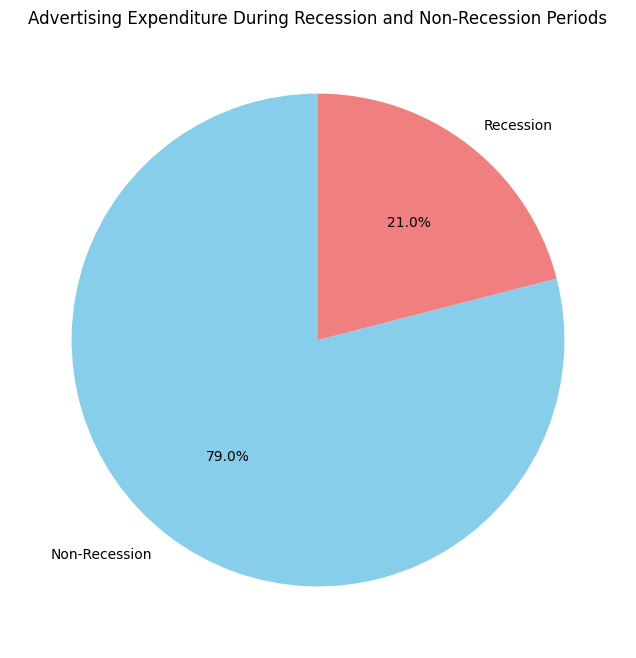

In [ ]:
# Group by recession and sum the advertising expenditure
ad_expenditure = df.groupby('Recession')['Advertising_Expenditure'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
ad_expenditure.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Advertising Expenditure During Recession and Non-Recession Periods')
plt.ylabel('')
plt.savefig('Pie_1.png')  # Save the plot for submission
plt.show()

#Task 1.8 - Pie Chart for Advertisement Expenditure by Vehicle Type

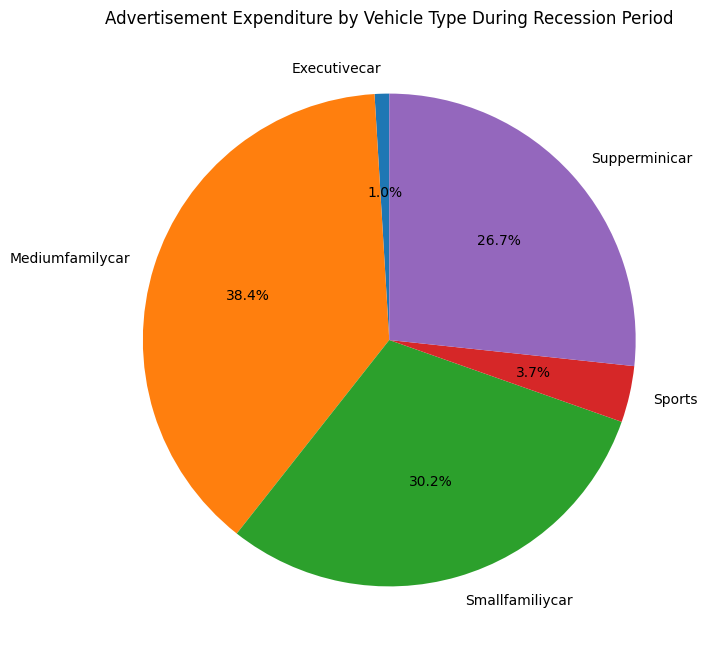

In [ ]:
# Filter data for recession periods
recession_data = df[df['Recession'] == 'Recession']

# Group by vehicle type and sum the advertising expenditure
vehicle_ad_expenditure = recession_data.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create the pie chart
plt.figure(figsize=(8, 8))
vehicle_ad_expenditure.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Advertisement Expenditure by Vehicle Type During Recession Period')
plt.ylabel('')
plt.savefig('Pie_2.png')  # Save the plot for submission
plt.show()

#Task 1.9 - Line Plot for Unemployment Rate vs Vehicle Type and Sales

<Figure size 1000x600 with 0 Axes>

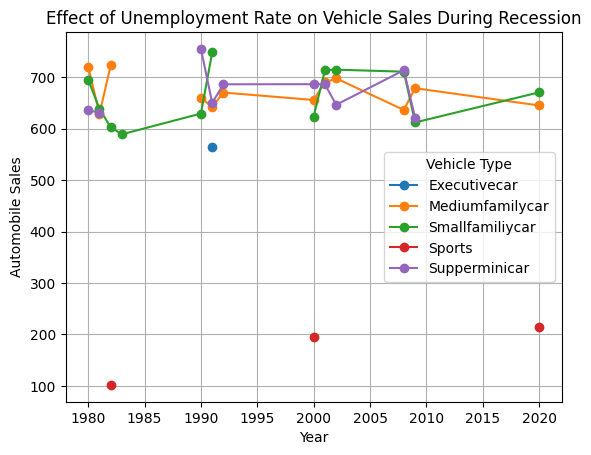

In [ ]:
# Group by year and vehicle type, calculating the mean unemployment rate and sales during recession
unemployment_sales = df[df['Recession'] == 'Recession'].groupby(['Year', 'Vehicle_Type'])[['unemployment_rate', 'Automobile_Sales']].mean().unstack()

# Create the line plot
plt.figure(figsize=(10, 6))
unemployment_sales['Automobile_Sales'].plot(kind='line', marker='o')
plt.title('Effect of Unemployment Rate on Vehicle Sales During Recession')
plt.ylabel('Automobile Sales')
plt.xlabel('Year')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.savefig('Line_plot_3.png')  # Save the plot for submission
plt.show()


#Task 2.1 - Create Dash Application with Title

In [ ]:
!pip install dash

In [ ]:
# Dash imports and application setup
from dash import Dash, html

# Create Dash app
app = Dash(__name__)

# Create a meaningful title
app.layout = html.Div([
    html.H1('Automobile Sales Analysis Dashboard')
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Task 2.2 - Add Dropdown to Dashboard

In [ ]:
from dash import Dash, html, dcc # Import dcc here

# Create Dash app
app = Dash(__name__)

# Define the layout with the dropdown BEFORE running the app
app.layout = html.Div([
    html.H1('Automobile Sales Analysis Dashboard'),
    html.Label('Select Vehicle Type:'),
    dcc.Dropdown(
        options=[
            {'label': 'Sedan', 'value': 'Sedan'},
            {'label': 'SUV', 'value': 'SUV'},
            {'label': 'Truck', 'value': 'Truck'},
        ],
        value='Sedan'
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Task 2.3 - Add Division for Output

In [ ]:
#!pip install dash

from dash import Dash, html, dcc # Make sure dcc is imported

# Create Dash app using dash.Dash
app = Dash(__name__)

app.layout = html.Div([
    html.H1('Automobile Sales Analysis Dashboard'),
    html.Label('Select Vehicle Type:'),
    dcc.Dropdown(
        id='vehicle-dropdown',
        options=[
            {'label': 'Sedan', 'value': 'Sedan'},
            {'label': 'SUV', 'value': 'SUV'},
            {'label': 'Truck', 'value': 'Truck'},
        ],
        value='Sedan'
    ),
    html.Div(id='output-div', className='output-style')
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

#Task 2.4 - Create Callbacks

In [ ]:
from dash import Dash, html, dcc
from dash.dependencies import Input, Output # Import Input and Output here

# Create Dash app
app = Dash(__name__)

# Define the layout
app.layout = html.Div([
    html.H1('Automobile Sales Analysis Dashboard'),
    html.Label('Select Vehicle Type:'),
    dcc.Dropdown(
        id='vehicle-dropdown',
        options=[
            {'label': 'Sedan', 'value': 'Sedan'},
            {'label': 'SUV', 'value': 'SUV'},
            {'label': 'Truck', 'value': 'Truck'},
        ],
        value='Sedan'
    ),
    html.Div(id='output-div', className='output-style')
])

# Callback to update the output-div (defined before running the app)
@app.callback(
    Output('output-div', 'children'),
    [Input('vehicle-dropdown', 'value')]
)
def update_output(selected_vehicle):
    return f'Selected Vehicle Type: {selected_vehicle}'

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

#Task 2.5 - Recession Report Graphs

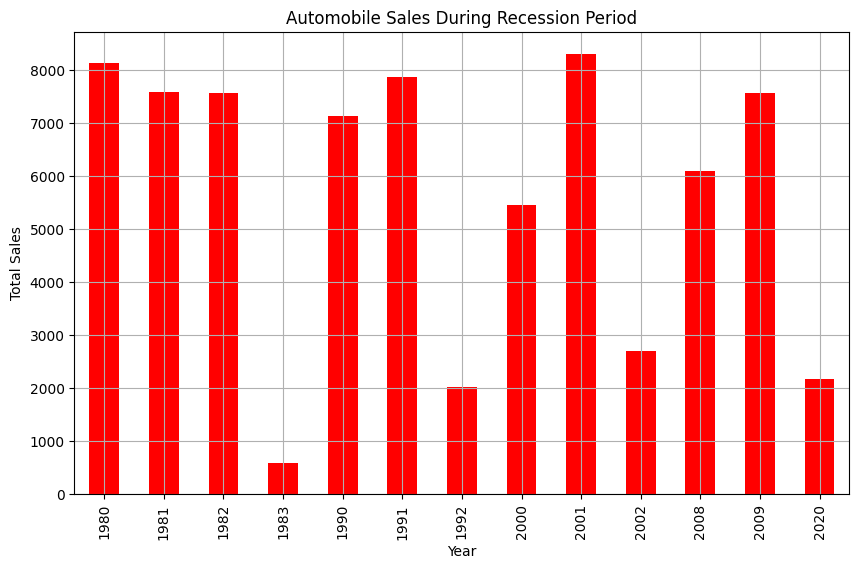

In [ ]:
# Recession report plot
plt.figure(figsize=(10, 6))
recession_sales = df[df['Recession'] == 'Recession'].groupby('Year')['Automobile_Sales'].sum()
recession_sales.plot(kind='bar', color='red')
plt.title('Automobile Sales During Recession Period')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.grid(True)
plt.savefig('RecessionReportgraphs.png')
plt.show()

#Task 2.6 - Yearly Report Graphs

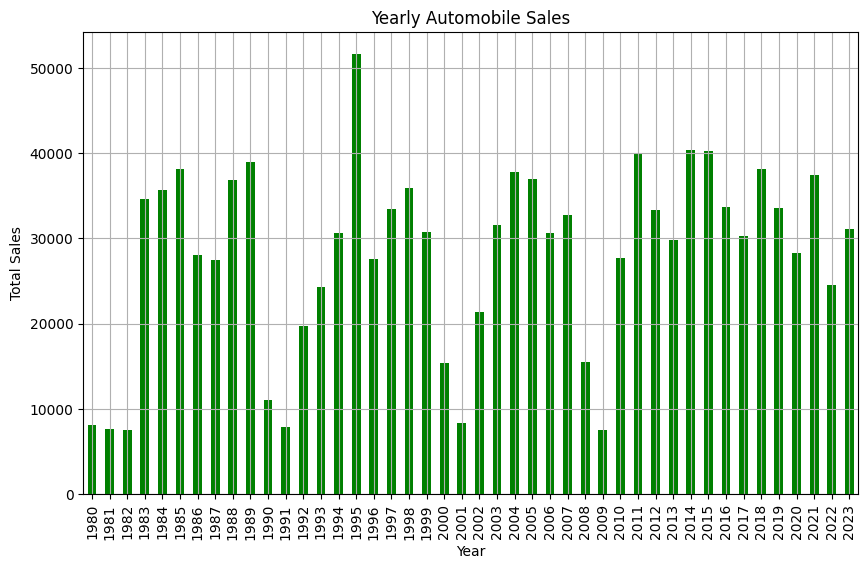

In [ ]:
# Yearly report plot
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='green')
plt.title('Yearly Automobile Sales')
plt.ylabel('Total Sales')
plt.xlabel('Year')
plt.grid(True)
plt.savefig('YearlyReportgraphs.png')
plt.show()